In [1]:
# 1. Gerekli kütüphaneler
import pandas as pd
import numpy as np

# 2. Temiz veriyi yükle
df = pd.read_csv("../data/clean_data.csv")

# 3. Etkileşim oranları hesapla
df['like_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1e-5)
df['comment_density'] = df['comment_count'] / (df['views'] + 1e-5)
df['like_per_view'] = df['likes'] / (df['views'] + 1e-5)
df['dislike_per_view'] = df['dislikes'] / (df['views'] + 1e-5)

# 4. Yeni binary özellikler (var-yok gibi)
df['has_tags'] = df['tags'].apply(lambda x: 0 if x == '[none]' else 1)
df['title_length'] = df['title'].apply(len)
df['tag_count'] = df['tags'].apply(lambda x: 0 if x == '[none]' else len(x.split('|')))

# 5. Kategorik değişkenlerin encode edilmesi
df['category_id'] = df['category_id'].astype("category")
df['category_code'] = df['category_id'].cat.codes

# 6. Gerekli sütunları seç
selected_columns = [
    'views', 'likes', 'dislikes', 'comment_count',
    'like_ratio', 'comment_density', 'like_per_view', 'dislike_per_view',
    'has_tags', 'title_length', 'tag_count', 'category_code'
]

selected_columns = [
    # raw değerleri atlıyoruz: 'likes', 'comment_count', 'dislikes', 'views'
    'title_length',
    'tag_count',
    'has_tags',
    'like_ratio',
    'comment_density',
    'like_per_view',
    'dislike_per_view',
    'publish_hour',
    'category_code'
]


features_df = df[selected_columns].copy()
features_df["views"] = df["views"]  # hedef sütunu sonradan ekle
features_df.to_csv("../data/features.csv", index=False)

print("✅ Özellik mühendisliği tamamlandı. 'features.csv' dosyası oluşturuldu.")


✅ Özellik mühendisliği tamamlandı. 'features.csv' dosyası oluşturuldu.


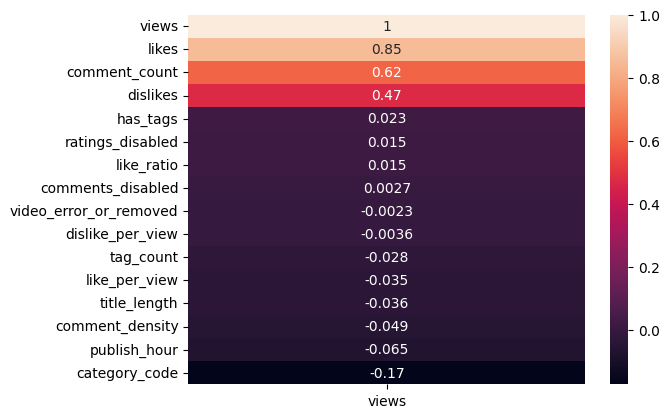

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
sns.heatmap(corr[['views']].sort_values(by='views', ascending=False), annot=True)
plt.show()
